In [2]:
import os
import h5py
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy.signal import find_peaks

In [13]:
#path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/20230130/20230130-ash-2023-04-03/videos/fly1-20sDLC_resnet50_20230130Apr3shuffle1_50000.h5"
path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/bruker_training/bruker-ash-2023-05-03/videos/test_perDLC_resnet50_brukerMay3shuffle1_160000.h5"

#the output is essentially x,y locations for each timestamp (and likelihoods)
#could just do a check to see if likelihoods are ok and then procede with analysis
#h5py file doesn't seem to have a header...but data is stored in ['df_with_missing']['table']

#could get header from csv or just input csv.It's not too big so its ok. Could restore in h5py with better organization

#ultimately look at xy for bodypart1 and bodypart2 (possibly rename in later labeling) 
# # and get eucl distance between them (do as array slicing like foraging code)
#bodyparts	bodypart1	bodypart1	bodypart1	bodypart2	bodypart2	bodypart2	bodypart3	bodypart3	bodypart3	objectA	objectA	objectA
#coords	x	y	likelihood	x	y	likelihood	x	y	likelihood	x	y	likelihood

# with h5py.File(path, 'r') as f:
#     print(f.keys())
#     index_i = np.array(f['df_with_missing']['_i_table']['index'])
#     abounds = np.array(f['df_with_missing']['_i_table']['index']['abounds'])
#     data = np.array(f['df_with_missing']['table'])

# print('hello', data[:][1])
# print(data.dtype)
# print(data[:]['values_block_0'][:,0]) ##this is the first column (head x)

def get_data_column(path, index):
    """takes path to h5 file and returns the column of data for specific index --- 
    must know the index for corresponding labeled data-may need to check csv because no header in h5 file"""
    with h5py.File(path, 'r') as f:
        data = np.array(f['df_with_missing']['table'])

        #this data is formatted weird. values block indicates the psuedo dict key toget to data part, 
        # then want every column
        specified_column = data[:]['values_block_0'][:,index]
        return specified_column

head_x = get_data_column(path, 0)
head_y = get_data_column(path, 1)
head_likelihood = get_data_column(path, 2)
proboscis_x = get_data_column(path, 3)
proboscis_y = get_data_column(path, 4)
proboscis_likelihood = get_data_column(path, 5)
extended_x = get_data_column(path, 6)
extended_y = get_data_column(path, 7)
extended_likelihood = get_data_column(path, 8)
## mid proboscis that *should* be labelled only when proboscis is out is index 6-8 (x,y,likelihood)




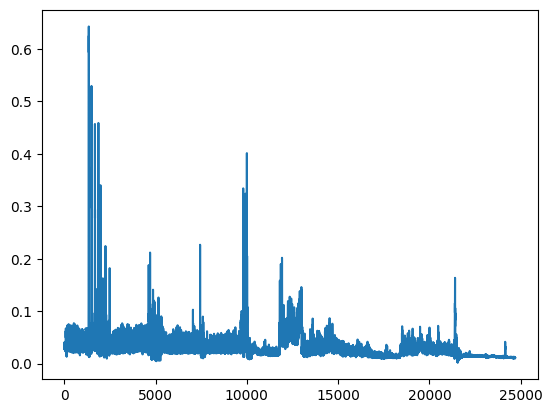

In [34]:
plt.plot(extended_likelihood)
#plt.plot(proboscis_likelihood)

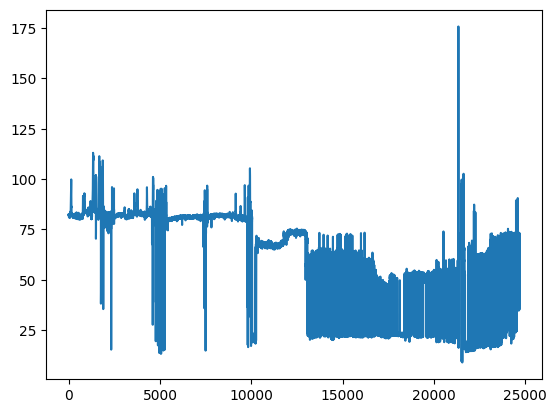

In [4]:
## plot difference between head and proboscis

difference = np.sqrt((head_x - proboscis_x)**2 + (head_y - proboscis_y)**2)

plt.plot(difference)

##now need to decide if this is real... and if the magnitude is reflective of actual PER being bigger
##import roi data and compare
#and run scipy peaks on it

<KeysViewHDF5 ['PER onsets', 'PER peaks', 'PER peaks (s)', 'raw PER']>
(1, 1153)
[   349    542    680 ... 202115 202185 202396]


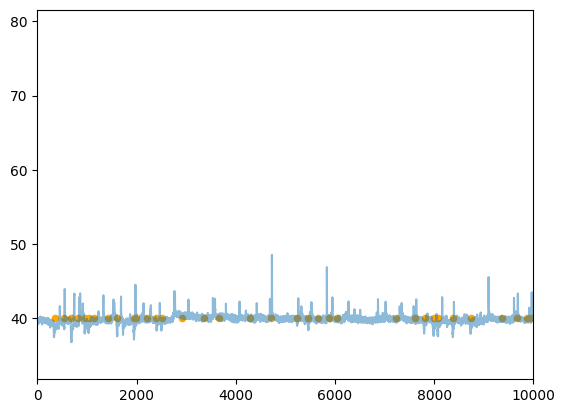

In [121]:
# ## path to ROI calc peaks
# path_roi = "C:/Users/ashsm/OneDrive/Documents/Stanford/Bruker behavior/20230130/scipy/ideo_fly1-20s_frames_python_peaks.h5"
# with h5py.File(path_roi, 'r') as f:
#     print(f.keys())
#     #PER_peaks = np.array(f['PER peaks'])
#     PER_peaks = f['PER peaks'][()]
#     raw_PER = f['raw PER'][()]
#     PER_onsets = f['PER onsets'][()]
# print(np.shape(PER_peaks))
# print(PER_peaks[0])
# plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*40, color = 'orange', s = 20)
# plt.plot(difference, alpha = .5)
# plt.xlim(0,10000)

# plt.show()

In [1]:
# def get_peaks(data):
#     """	data = one flies worth of raw data, 
#     returns list of list of peaks for light and PER where light and PER have different scipy requirements"""

#     #1. get mean column indices and mean titles
#     mean_indices = get_mean_indices(data)
#     mean_titles = get_mean_titles(data)

#     #2. find peaks
#     all_peaks= []
#     columns = [] #needed for boolean onsets later
#     for mean_index in range(len(mean_indices)):
#         single_column = get_means(data, mean_indices[mean_index])
#         #to get each element out of their own array and into one array with all elements
#         squeeze_column = np.squeeze(single_column) 
#         if is_column_light(mean_titles, 0, mean_index) or 'diode' in mean_titles[0][0]:
#             print('light')
#             #peaks, _ = scipy.signal.find_peaks(squeeze_column, prominence = .5)
#             columns.append(single_column)
#             ##modification for noisy diode data
#             light_median = np.median(single_column, axis = 0)
#             early_light_max = max(single_column[0:2000])
#             #peaks, _ = scipy.signal.find_peaks(squeeze_column, height = light_median[0], prominence = .3, distance = 10)
#             peaks, properties = scipy.signal.find_peaks(squeeze_column, height = early_light_max +.001, prominence = .1, distance = 10)
            
#         else:
#             print('PER')
#             peaks, properties = scipy.signal.find_peaks(squeeze_column*-1, prominence = 3, distance = 15) 
#             columns.append(single_column)
#             #distance is req frames between peaks
#         all_peaks.append(peaks)
#     return all_peaks, properties, columns


# ## way for ROIS  
# #PER_peaks, PER_peak_properties, PER_columns = get_peaks(data)

8


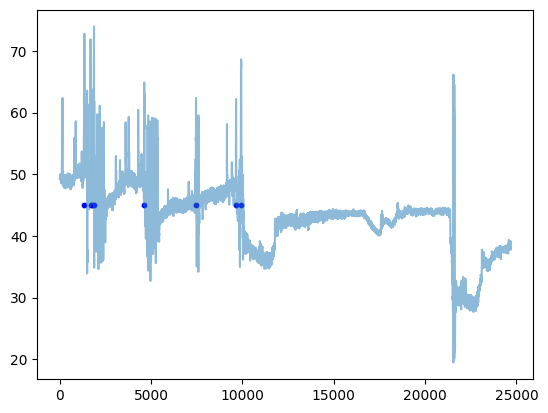

In [7]:
# ##first training

# DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 5, prominence = 15, distance = 30, width = 10)
# print(len(DLC_peaks))
# #DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 5, distance = 30)
# plt.plot(difference, alpha = .5)
# plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
# #plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*40, color = 'orange', s = 10)
# #plt.plot(raw_PER, alpha = .5, color = 'orange')


# #plt.xlim(0,10000)

116
29


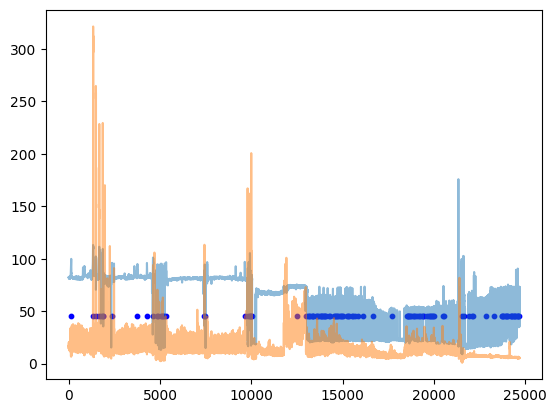

In [24]:


DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 5, prominence = 15, distance = 30, width = 10)
print(len(DLC_peaks))
#DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 5, distance = 30)
plt.plot(difference, alpha = .5)
plt.plot(extended_likelihood*500, alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
#plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*40, color = 'orange', s = 10)
#plt.plot(raw_PER, alpha = .5, color = 'orange')

likelihood_peaks, properties = scipy.signal.find_peaks(extended_likelihood, prominence = .1 ) #, distance = 30, width = 10)

print(len(likelihood_peaks))

#plt.xlim(0,10000)

In [6]:
## import csv code with labels I did 
#I labeled 2 points periodically
#when PERstarts coming out I labelled a third point (or if the per is small I labelled a third point)
##if the PER is big I labelled a 4th point at the peak

#the csv file repeats frame numbers for labelled points for each labelled point 
import csv
csv_path = "C:/Users/ashsm/Downloads/find_per_csv.csv"
labelled = []
with open(csv_path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    data_single = list(reader)
    labelled.append(data_single)
labelled = labelled[0]

In [7]:

##region id = 3 is fully extended prob
## region id = 0 is top of head
## region id = 1 is Proboscis tip
## region id = 2 is partially extended PER or beginning of full extension
header = labelled[0]
print(header)
print(len(labelled[0]))

all_big_per_frames = []
for i in range(len(labelled)):
    region_id = labelled[i][4]
    if region_id == '3':
        frame_id = labelled[i][0]
        all_big_per_frames.append(frame_id)
print(all_big_per_frames)


all_start_per_frames = []
for i in range(len(labelled)):
    region_id = labelled[i][4]
    if region_id == '2':
        frame_id = labelled[i][0]
        all_start_per_frames.append(frame_id)
#print(all_start_per_frames)

['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']
7
['V01frame0000147.jpg', 'V01frame0000789.jpg', 'V01frame0000860.jpg', 'V01frame0001204.jpg', 'V01frame0001299.jpg', 'V01frame0001331.jpg', 'V01frame0001341.jpg', 'V01frame0001490.jpg', 'V01frame0001670.jpg', 'V01frame0001779.jpg', 'V01frame0001858.jpg', 'V01frame0003077.jpg', 'V01frame0003301.jpg', 'V01frame0003596.jpg', 'V01frame0003766.jpg', 'V01frame0004289.jpg', 'V01frame0004477.jpg', 'V01frame0004615.jpg', 'V01frame0007057.jpg', 'V01frame0007418.jpg', 'V01frame0007456.jpg', 'V01frame0007460.jpg', 'V01frame0008940.jpg', 'V01frame0009149.jpg', 'V01frame0009421.jpg', 'V01frame0009648.jpg', 'V01frame0009916.jpg']


In [8]:
## get frame number out of frame filename
frame = 'V01frame0000147.jpg'
num_frame = frame.split('.')[0]
num_frame = int(num_frame.replace('V01frame', ''))
print(num_frame)

frame_num_big_per = []
for frame in all_big_per_frames:
    num_frame = frame.split('.')[0]
    num_frame = int(num_frame.replace('V01frame', ''))
    frame_num_big_per.append(num_frame)

frame_num_per = []
for frame in all_start_per_frames:
    num_frame = frame.split('.')[0]
    num_frame = int(num_frame.replace('V01frame', ''))
    frame_num_per.append(num_frame)

147


In [9]:
## open data from READ_ROIS
SavePath = 'C:/Users/ashsm/Documents/Stanford/bruker behavior/per'
with h5py.File(os.path.join(SavePath, "PERpeaks.hdf5"), "r") as f:
    print(f.keys())
    ROI_PER_peaks = f['PER peaks'][()]
    ROI_PER_raw = f['raw PER'][()]


<KeysViewHDF5 ['PER peaks', 'light peaks', 'raw PER', 'raw light']>


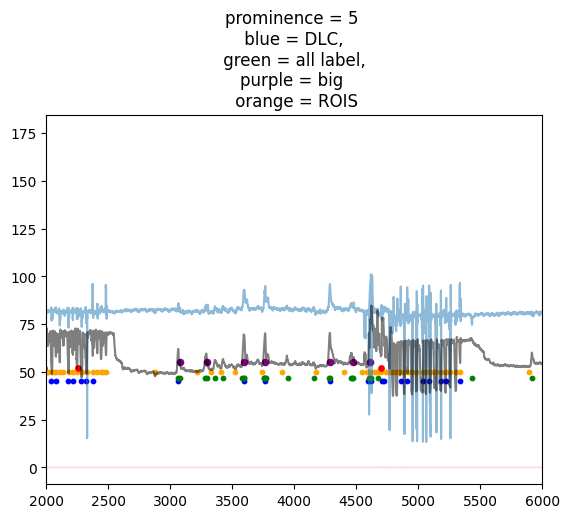

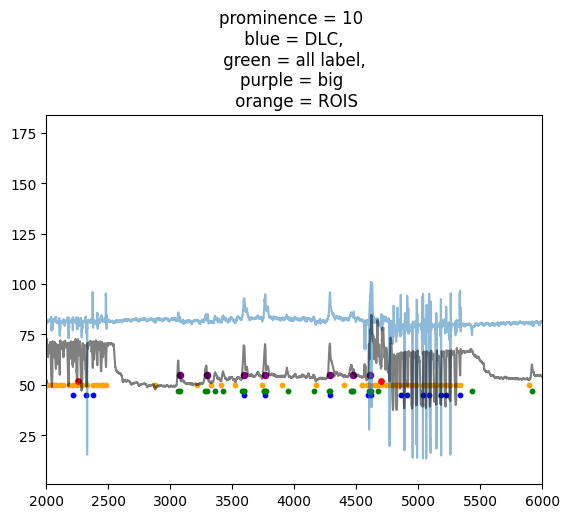

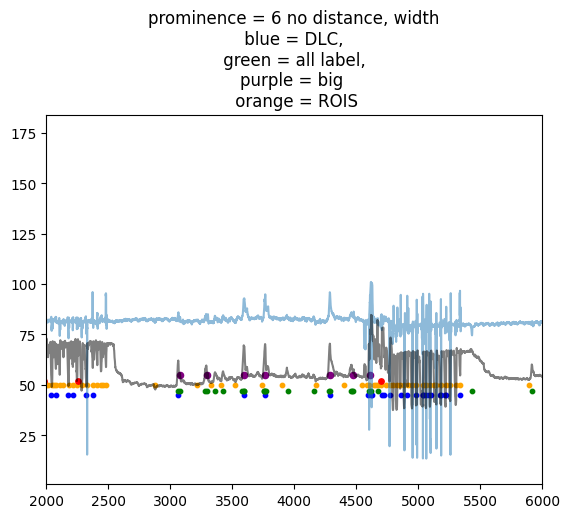

In [55]:
start = 2000
stop = 6000

## plot my labelled frames vs. DLC
DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 1, prominence = 5, distance = 15, width = 5)
likelihood_peaks, properties = scipy.signal.find_peaks(extended_likelihood, prominence = .2) #, height = 1, prominence = 5, distance = 15, width = 5)


plt.plot(difference, alpha = .5)
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)
plt.plot(extended_likelihood, color = 'pink', alpha = .5)

plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*55, color = 'purple', s = 20, alpha = 1)
plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.scatter(likelihood_peaks, np.ones(len(likelihood_peaks)) * 52, color = 'red', s = 15)
plt.title(f'prominence = 5 \n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')

plt.xlim(start,stop)
plt.show()

DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 1, prominence = 10, distance = 15, width = 5)

plt.plot(difference, alpha = .5)
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)

plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*55, color = 'purple', s = 20, alpha = 1)
plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.scatter(likelihood_peaks, np.ones(len(likelihood_peaks)) * 52, color = 'red', s = 15)

plt.title(f'prominence = 10 \n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')
plt.xlim(start,stop)
plt.show()

DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 6, width = 5)

plt.plot(difference, alpha = .5)
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*55, color = 'purple', s = 20, alpha = 1)
plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.scatter(likelihood_peaks, np.ones(len(likelihood_peaks)) * 52, color = 'red', s = 15)

plt.title(f'prominence = 6 no distance, width\n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')
plt.xlim(start,stop)
plt.show()

#plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*50, color = 'red', s = 10, alpha = 1)

(2000.0, 6000.0)

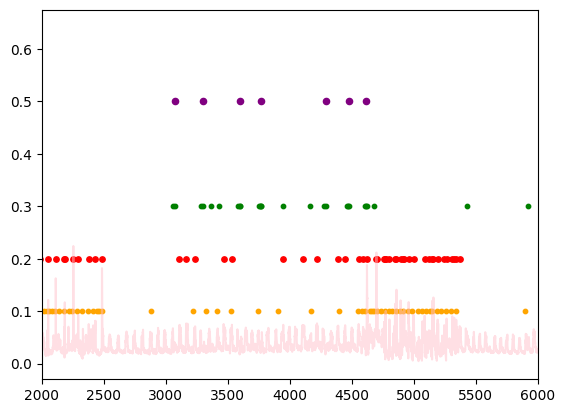

In [54]:
start = 2000
stop = 6000
likelihood_peaks, properties = scipy.signal.find_peaks(extended_likelihood, prominence = .05)         
plt.plot(extended_likelihood, color = 'pink', alpha = .5)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*.5, color = 'purple', s = 20, alpha = 1)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*.3, color = 'green', s = 10, alpha = 1)
plt.scatter(likelihood_peaks, np.ones(len(likelihood_peaks)) * .2, color = 'red', s = 15)
plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*.1, color = 'orange', s = 10)

plt.xlim(start,stop)


I need to get the raw data from ROIs to compare against the DLC difference
#done

prominence = 0
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 482
prominence = 1
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 475
prominence = 2
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 384
prominence = 3
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 334
prominence = 4
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 317
prominence = 5
number of peaks that DLC and labelled both found: 15
number of labelled PER that DLC missed: 12
number of DLC peaks that are unlabelled: 304
prominence = 6
number of peaks that DLC and labelled both found:

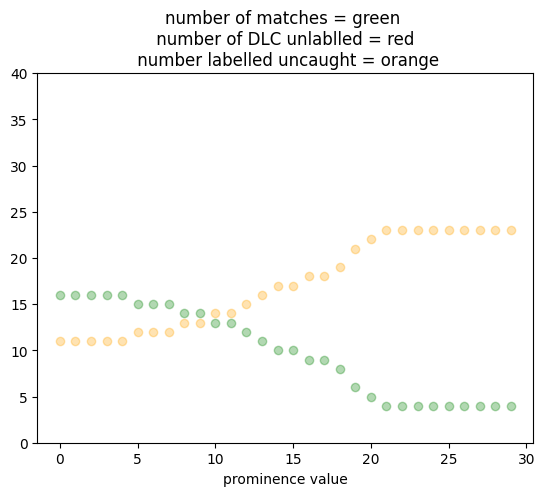

In [12]:
##big PER, vs. DLC
DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 7, width = 5)


##test if DLC and label find the same peaks

for prominence in range(0,30):
    DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = prominence, width = 7)


    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in DLC_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    print('prominence =', prominence)
    print("number of peaks that DLC and labelled both found:",count_matches)
    #print(len(frame_num_big_per))
    print('number of labelled PER that DLC missed:', len(frame_num_big_per) - count_matches)
    print('number of DLC peaks that are unlabelled:', len(DLC_peaks) - count_matches)
    plt.scatter(prominence, count_matches, color = 'green', alpha = .3)
    plt.scatter(prominence, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(prominence, len(DLC_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('number of matches = green \n number of DLC unlablled = red \n number labelled uncaught = orange')
plt.ylim(0,40)
plt.xlabel("prominence value")
plt.show()

    #I want a condition for if none of the peaks are in frame_num to let me know
#I want to find # that match and the # that don't
    

29
prominence = 0.0
number of peaks that DLC likelihood and labelled both found: 62
number of labelled PER that DLC likelihood missed: -35
number of DLC likelihood peaks that are unlabelled: 7723
prominence = 0.05
number of peaks that DLC likelihood and labelled both found: 3
number of labelled PER that DLC likelihood missed: 24
number of DLC likelihood peaks that are unlabelled: 123
prominence = 0.1
number of peaks that DLC likelihood and labelled both found: 3
number of labelled PER that DLC likelihood missed: 24
number of DLC likelihood peaks that are unlabelled: 26
prominence = 0.15000000000000002
number of peaks that DLC likelihood and labelled both found: 3
number of labelled PER that DLC likelihood missed: 24
number of DLC likelihood peaks that are unlabelled: 12
prominence = 0.2
number of peaks that DLC likelihood and labelled both found: 3
number of labelled PER that DLC likelihood missed: 24
number of DLC likelihood peaks that are unlabelled: 8
prominence = 0.25
number of pea

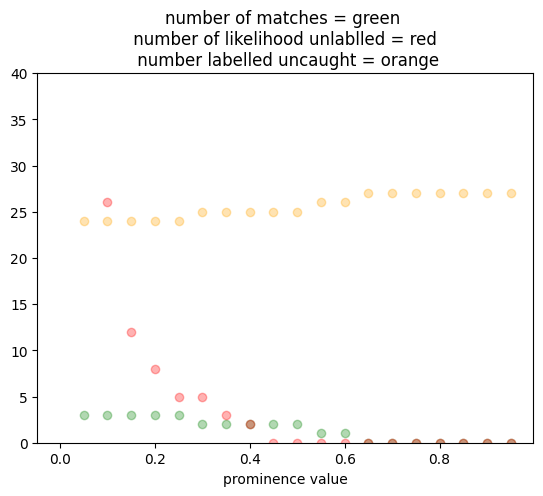

In [30]:
## test likelihood peaks
##big PER, vs. DLC
likelihood_peaks, properties = scipy.signal.find_peaks(extended_likelihood, prominence = .1)#, width = 5)
print(len(likelihood_peaks))

##test if DLC and label find the same peaks

for i in range(0,20):
    prominence = i*.05
    likelihood_peaks, properties = scipy.signal.find_peaks(extended_likelihood, prominence = prominence ) #, width = 7)


    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in likelihood_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    print('prominence =', prominence)
    print("number of peaks that DLC likelihood and labelled both found:",count_matches)
    #print(len(frame_num_big_per))
    print('number of labelled PER that DLC likelihood missed:', len(frame_num_big_per) - count_matches)
    print('number of DLC likelihood peaks that are unlabelled:', len(likelihood_peaks) - count_matches)
    plt.scatter(prominence, count_matches, color = 'green', alpha = .3)
    plt.scatter(prominence, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(prominence, len(likelihood_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('number of matches = green \n number of likelihood unlablled = red \n number labelled uncaught = orange')
plt.ylim(0,40)
plt.xlabel("prominence value")
plt.show()

    #I want a condition for if none of the peaks are in frame_num to let me know
#I want to find # that match and the # that don't
    

width = 0
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 45
width = 1
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 41
width = 2
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 33
width = 3
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 21
width = 4
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 14
width = 5
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC missed: 15
number of DLC peaks that are unlabelled: 10
width = 6
number of peaks that DLC and labelled both found: 12
number of labelled PER that DLC misse

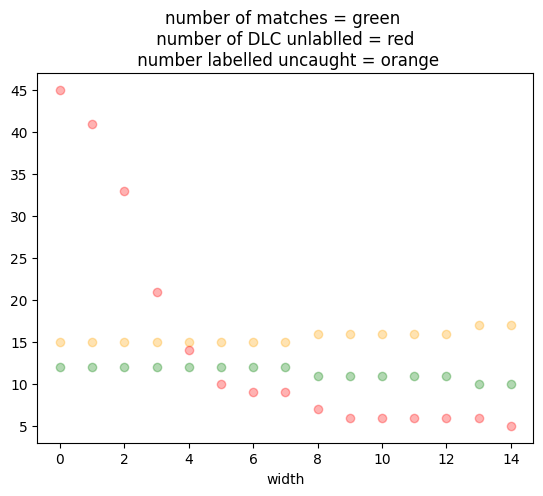

In [125]:
##adjust width

for width in range(0,15):
    DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 10, width = width)


    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in DLC_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    print('width =', width)
    print("number of peaks that DLC and labelled both found:",count_matches)
    #print(len(frame_num_big_per))
    print('number of labelled PER that DLC missed:', len(frame_num_big_per) - count_matches)
    print('number of DLC peaks that are unlabelled:', len(DLC_peaks) - count_matches)
    plt.scatter(width, count_matches, color = 'green', alpha = .3)
    plt.scatter(width, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(width, len(DLC_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('number of matches = green \n number of DLC unlablled = red \n number labelled uncaught = orange')
#plt.ylim(0,40)
plt.xlabel("width")
plt.show()


##prominence 10 and width 7 looks the best so far stillmissing a lot though

[29150 30061 31071 33056 34191 34404 35145 36380 38301 40483]


(120000.0, 160000.0)

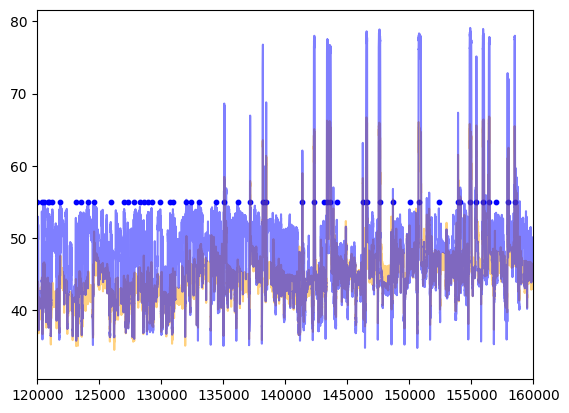

In [128]:
print(DLC_peaks[0:10])

start = 120000
stop = 160000
plt.plot(raw_PER, alpha = .5, color = 'orange')
plt.plot(difference, alpha = .5, color = 'blue')
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*55, color = 'blue', s = 10)
#plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*54, color = 'red', s = 10)
#plt.scatter(PER_onsets, np.ones(len(PER_onsets))*56, color = 'black', s = 5)
plt.xlim(start,stop)

In [78]:
def get_smoothed_increase_index(data):
    """return indices where intensity increases from smoothed data (prev look for decrease, but with DLC look for increase)"""
    smoothed_intensity_decreases, smooothed_intensity_increases = get_smoothed_intensity_changes(data)
    smoothed_increase_index = []
    for column in range(len(smooothed_intensity_increases)):
        true_indices = np.where(smooothed_intensity_increases[column])
        smoothed_increase_index.append(np.squeeze(true_indices))
    return smoothed_increase_index

def get_smoothed_intensity_changes(data, smoothed_threshold = 1):
    """returns decreses in intensity and increases--combines with smoothing the means matrix in old version"""
    #smoothed_means_matrix = get_smoothed_means_matrix(data)
    smoothed_data = data[:-2]/3 + data[1:-1]/3 + data[2:]/3
    #to just see if previous value greater than next value of smoothened array--if the intensity drops
    smoothed_intensity_decreases = []
    smoothed_intensity_decreases = smoothed_data[:-1]>(smoothed_data[1:] + smoothed_threshold)
    smoothed_intensity_decreases = smoothed_intensity_decreases.T  #want to stack the other way
    
    #to just see if previous value smaller than next value of smoothened array--if the intensity increases
    smoothed_intensity_increases = []
    smoothed_intensity_increases = smoothed_data[:-1]<(smoothed_data[1:] + smoothed_threshold)
    smoothed_intensity_increases = smoothed_intensity_increases.T
    
    return smoothed_intensity_decreases, smoothed_intensity_increases

# def get_smoothed_means_matrix(data):
#     """inputs data and returns smoothed_means_matrix, smoothed_intensity_decreases, smooothed_intensity_increases"""
#     #call each column to perform the vectorized smoothing average over 3 frames to see if it changes intensity
#     ##Essentially take windowsize number of columns that are off by 1 until get to windowsize (in this case=3)
#     ##[begin:end:stride] end is exclusive so if you want to include item #n write n+1. -1 is second to last
#     ###NOTE: this will not give a value for the last 2 items (will shorten the array by 2) 
    
#     means_matrix = make_means_matrix(data)

#     smoothed_means_matrix = []
#     smoothed_means_matrix = means_matrix[:-2]/3 + means_matrix[1:-1]/3 + means_matrix[2:]/3
    
#     return smoothed_means_matrix

def get_PER_onset(peaks, smoothed_increase_index, PER_threshold = 50):
    """find onset of peaks from scipy peaks and intensity changes
    #onset is found by looking at the frames of peaks and looking for the smoothed_intensity change before that
    #for PER looking for a decrease, for light looking for an increase
    #I want to look at the peaks values of each column and compare them to the intensity changes of each column 
    threshold is max # of frames away from peak to look for onset
    OUTPUT is boolean matrix, if need the other matrix later then rewrite return to be all_onsets_matrix as well"""
    #smoothed_increase_index = get_smoothed_increase_index(data)
    
    onsets = []
    onset = [] 
    for i in range(len(peaks)):
                possible_onset = []
                new_possible_onset = []
                if len(smoothed_increase_index) > 1: #if it is not empty or one element
                    for j in range(len(smoothed_increase_index)):
                        if smoothed_increase_index[j] < peaks[i] and peaks[i] - smoothed_increase_index[j] < PER_threshold: 
                            #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
                            possible_onset.append(smoothed_increase_index[j]) #make a list of possible onsets 
                        else:
                            possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match    
                    if i == 0: #if we are on the first element in peaks_PER
                        if possible_onset: #checks to make sure there is something in possible_onset
                            onset = int(np.median(possible_onset)) #needs to be int because it is an index
                    if i > 0: #if it is not the first element
                        #remove the possible onsets that are before the previous peak then take the first one
                        for onset_index in possible_onset:
                            if onset_index > peaks[i-1]:  
                                #I need to fix this in case it is not >. I think skip otherwise?
                                new_possible_onset.append(onset_index)
                                #onset = new_possible_onset[0]  
                                #might be better if this doesn't have to collect the first one everytime, 
                                # but it should work fine and eliminates the issue if the if statement is not true
                                onset = int(np.median(new_possible_onset)) #needs to be int because it is an index
                    #to prevent appending empty lists
                    if onset:  #this fails if onset is an empty list and will not append anything
                        onsets.append(onset)

In [58]:
PER_onset_DLC = get_PER_onset(DLC_peaks, difference, PER_threshold = 50)

C:\Users\ashsm\AppData\Local\Temp\ipykernel_6248\1753272901.py:56: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if smoothed_increase_index[j] < peaks[i] and peaks[i] - smoothed_increase_index[j] < PER_threshold:


[111718 111959 112033 112172 112233 112605 112740 113046 113179 113299]


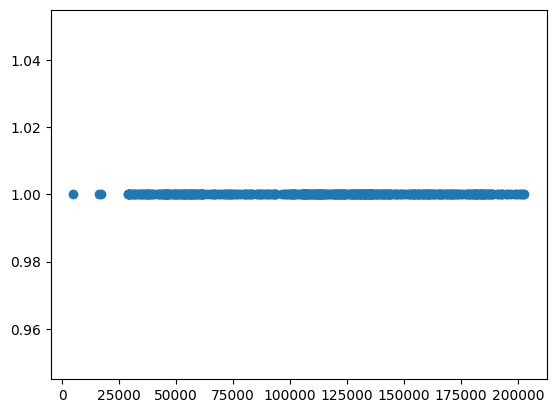

In [98]:
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks)))
print(DLC_peaks[210:220])

()
(202765,)
(202768,)
[ True  True  True ...  True  True  True]


 ...]

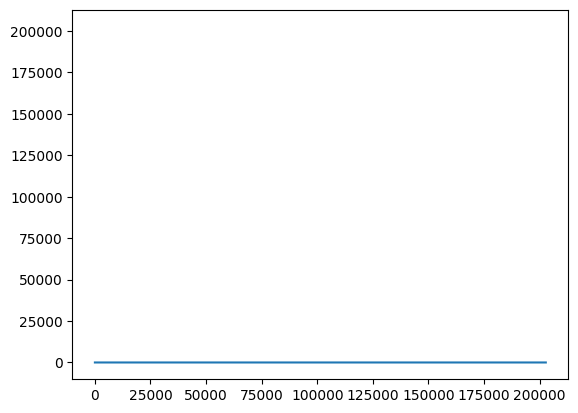

In [75]:
print(np.shape(PER_onset_DLC))
changes_bool_decrease, changes_bool_increase = get_smoothed_intensity_changes(difference, smoothed_threshold = 1)
print(np.shape(changes_bool_increase))
print(np.shape(difference))

smoothed_increase_index = np.where(changes_bool_increase==True)
print(changes_bool_increase)
plt.plot(changes_bool_increase)
plt.plot(smoothed_increase_index)
#plt.scatter(smoothed_increase_index, np.ones(len(smoothed_increase_index)))

In [79]:
DLC_PER_onset = get_PER_onset(DLC_peaks, smoothed_increase_index, PER_threshold = 50)

In [80]:
print(np.shape(DLC_PER_onset))

()
